# getting started with jupyter notebook

When I'm first learning something (python, matplotlib, jupyter notebook...), I usually start by looking for a simple working code example that's reasonably close to something I want to do, and start playing around with it. I usually get reasonably far that way -- first by guessing, then by Googling for documentation on specific functions or modules to see what other options I can tweak, and finally, when I realize I'm starting to flail aimlessly, by picking up a book and doing some background reading. This way I'm already motivated to learn what I read: "a-ha, so that's why that didn't work." If I try to read first (which you'd think is the proper and studious way to do it), I find that books are just too big, I don't have the time to ingest a whole book without doing something useful myself, and I feel like I'm forgetting stuff as fast as I read it.

For this week's homework, the [figure1.py](figure1.py) script is a good starting point. Here we'll show that same script, but in jupyter notebook style, and we'll compare/contrast to the standalone script.

Besides running jupyter notebook, there's some basic Python things we need to be able to do:

* Read from a file, line by line and field by field.
* Store data in memory so we can play with it.

and though we don't need it for the homework, it's also fun to see `matplotlib` in action for plotting data.

You need to have [Moriarty_SuppTable1](Moriarty_SuppTable1) downloaded and in the same directory as your jupyter notebook page, so we can read it here. If you don't have it, download it now and we'll start.


# import your modules

The [figure1.py](figure1.py) script also imports `sys`, because it's going to get the name of the data file from the command line in `sys.argv[1]`, and the name of the desired output file in `sys.argv[2]`. 

One difference between  jupyter notebook pages and command line scripts is that we'll just set such things directly as variables, since we don't have a command line.

Another difference is that in our notebook page, we'll insert the special command `%matplotlib notebook`, which tells matplotlib we're going to display our plots interactively in the notebook page.

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

tpmfile  = 'Moriarty_SuppTable1'

# read the data file

First code, then explanation:

In [2]:
tpmdata    = {}                       
for line in open(tpmfile):
    if line[0] == '#': continue     
    line   = line.rstrip('\n')      
    fields = line.split()           

    tpmdata[fields[0]] = [float(s) for s in fields[1:6]]


* `tpmdata = {}` initializes an empty __dict__. Think of a dict as a list that you access by keyword instead of by an integer. We're going to use gene names as the lookup keys when we access our data: `tpmdata['fig']` will give us the data for the gene _fig_.

* `for line in open(tpmfile)` is pythonic for "open `tpmfile` and read one line at a time from this file, storing it in `line`". You'll do this a _lot_.

* The next three lines are an idiomatic pattern for dealing with many kinds of whitespace-delimited data files that also allow lines starting with `#` to denote comments/documentation:
    * `if line[0] == '#': continue` skips comment lines.
    * `line   = line.rstrip('\n')` removes the newline character at the end of the line.
    * `fields = line.split()` splits the line on whitespace into a list. `fields[0]` is the first one, and so on. `len(fields)` would tell you how many fields there are. Here, `fields[0]` is the gene name, and the next five fields are the TPM values at the five time points.
    
* We store the TPM data as a __dict of lists__: `tpmdata['NPHP3']` is a list of five TPM values `[92.0  131.0  157.1  207.2  130.0]`, `tpmdata['NPHP3'][0]` is the first element of the list `92.0`, and so on. But right now `fields[1]` is a string, `'11.8'`, not a number `11.8`. We have to convert the fields (strings) to the numbers we store. We do that with a pythonic incantation, a __list comprehension__, which is shorthand for a `for` loop. `[float(s) for s in fields[1:6]]` says, for each element in the list slice `fields[1]`..`fields[5]`, call that element `s`, convert it to a floating point real number with `float(s)`, and put it in a new list.

# did it work?

An advantage of jupyter notebook is that you're "live": you can operate on the live data immediately, like taking samples or even making plots from it. This is terrific for debugging what you're doing. Let's check that we've got the data loaded (make sure you've executed the code cells up 'til now):

In [3]:
print(tpmdata['tomato'])

[5.7, 1.3, 0.3, 0.0, 0.0]


In [4]:
print(tpmdata['tomato'][0])
str(tpmdata['tomato'])

5.7


'[5.7, 1.3, 0.3, 0.0, 0.0]'

Looks like it's worked, yes?

# a simple xy plot

ok, now for the world's simplest plot: all you need is a list of x-axis values and a list of y-axis values: here, our five time points in hours, and the expression levels of our favorite gene.

We could have read the time points (the x-axis points) from the header line in the file, but here we cheat and hardcode those time points as a list [0, 12, 24, 48, 96]. Our notebook page is less flexible this way (we're making a strong assumption about what's in the data file) but that's ok, especially for exploratory stuff.

We're going to add one more wrinkle. If we only had one plot in our notebook page, we could just do `plt.plot(timepoints, tpmdata['tomato'])` and be done. But when we have more than one, the notebook page needs to keep track of them separately. A convenient trick for this is to use `plt.subplots` to give you back a __figure__ object and an __axes__ object that you can call methods on, just like you used `plt.`.


<IPython.core.display.Javascript object>


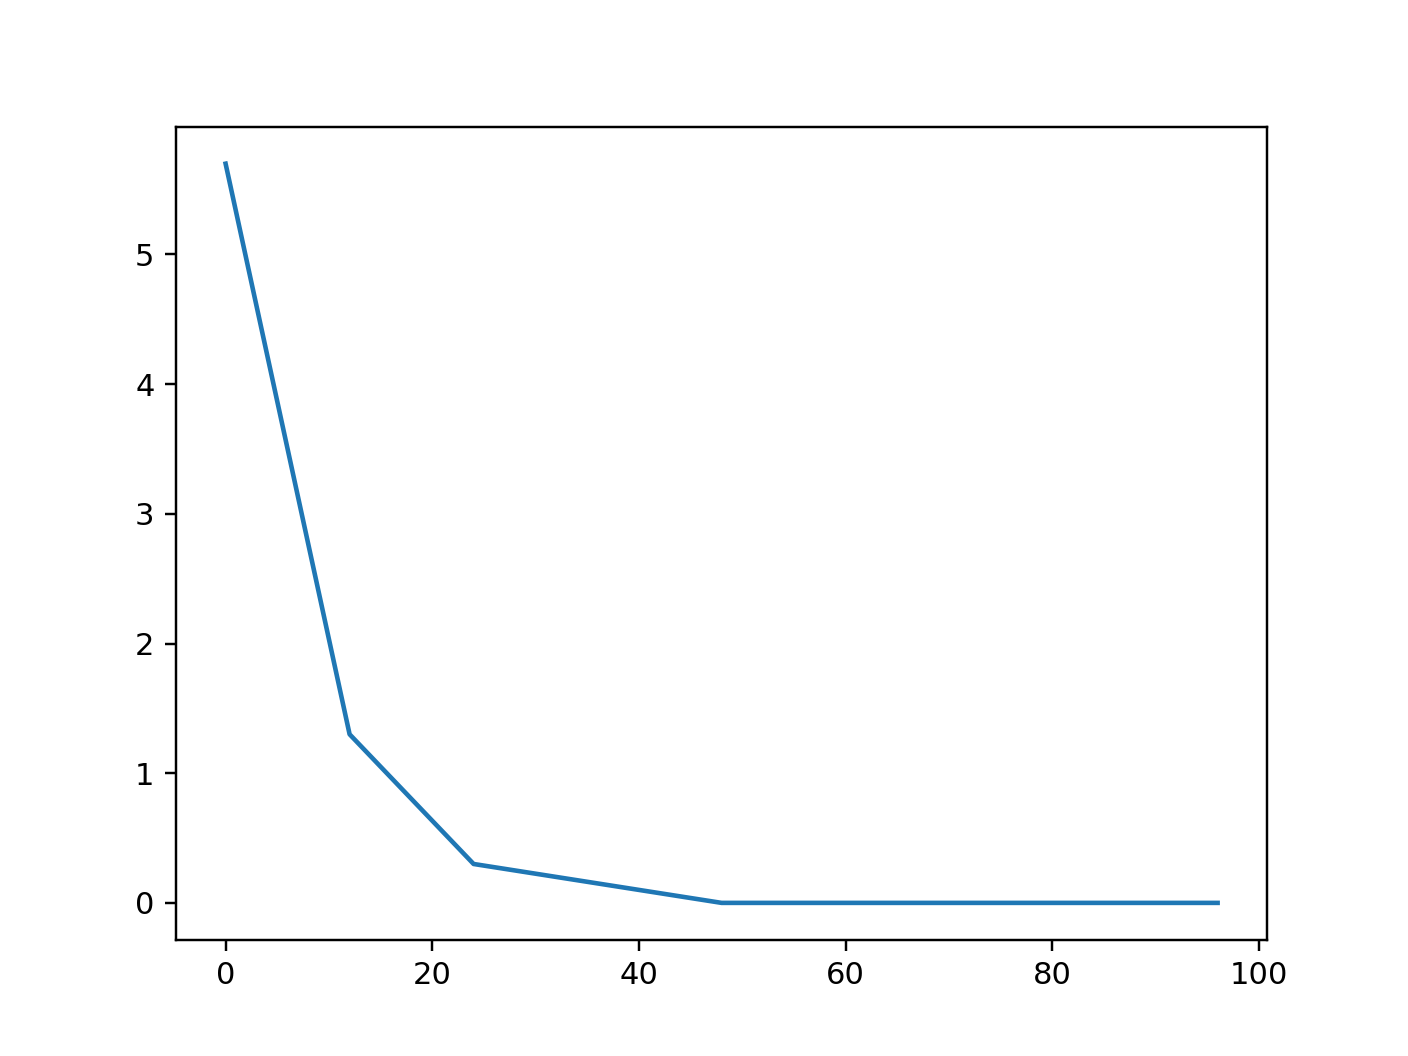

In [5]:
timepoints = [0, 12, 24, 48, 96]

fig1, axes1 = plt.subplots()
axes1.plot(timepoints, tpmdata['tomato'])


ta-da!

This is the moment when you go look up [documentation on the `plot` function](http://matplotlib.org/api/pyplot_api.html) to see what options you can play with. Here's a more complicated example, where we plot two lines on the same graph, with a bunch of customized stuff:

<IPython.core.display.Javascript object>


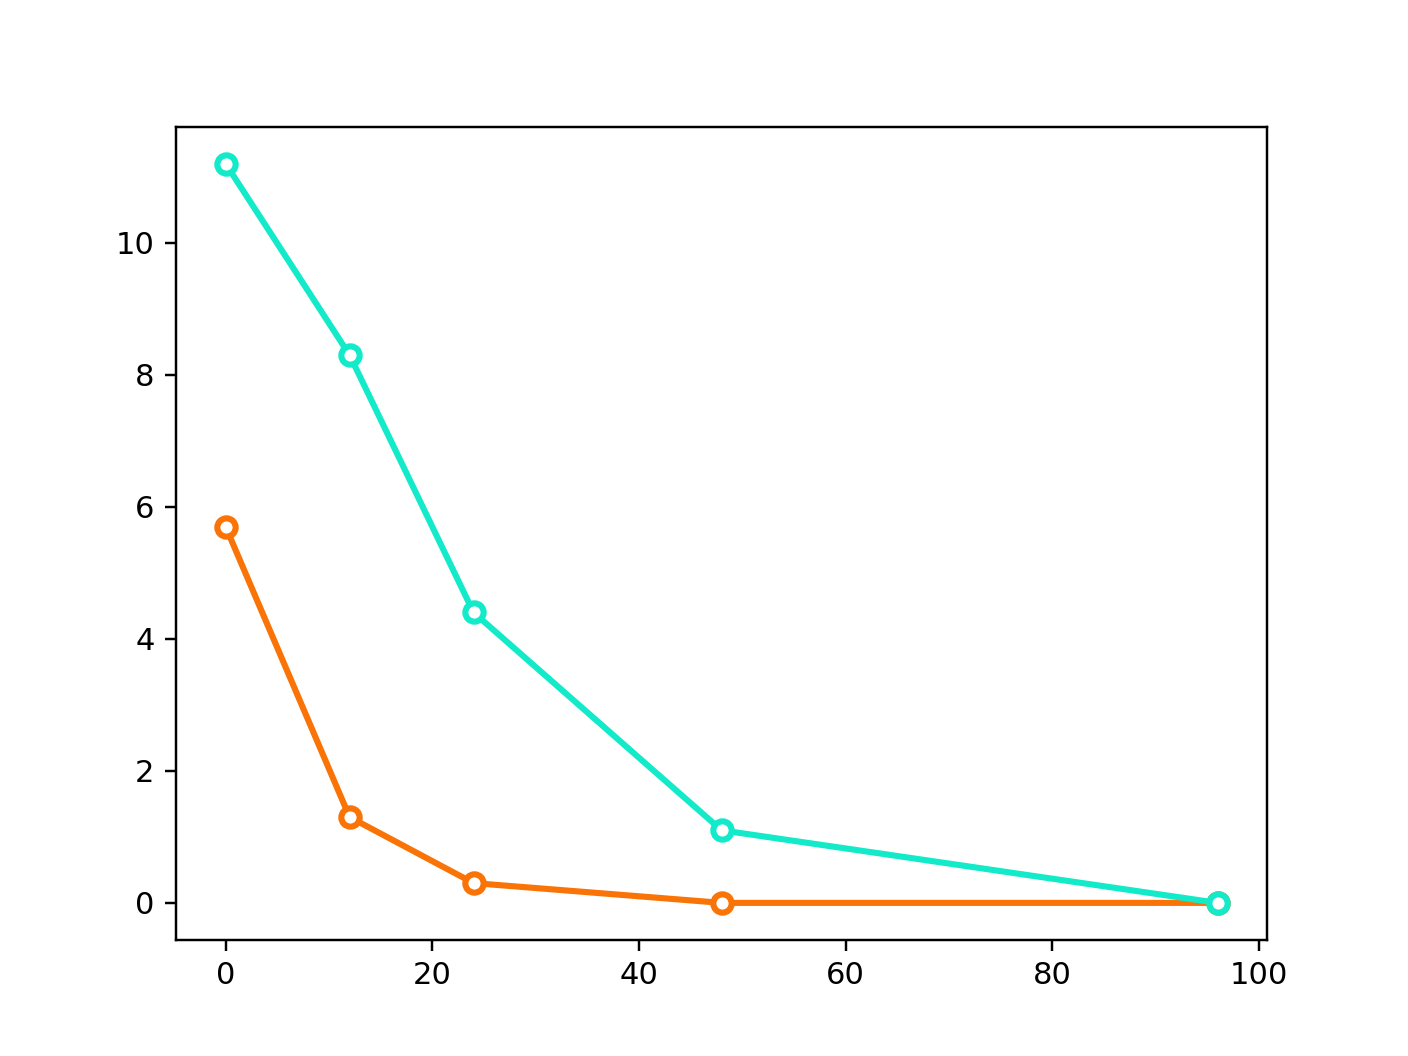

In [6]:
fig2, axes2 = plt.subplots()

axes2.plot(timepoints, tpmdata['tomato'], 
             marker='o',
             markerfacecolor='w', 
             markeredgecolor=('xkcd:orange'),
             markeredgewidth=2,
             color=('xkcd:orange'), 
             linewidth=2)
axes2.plot(timepoints, tpmdata['MLX'], 
             marker='o',
             markerfacecolor='w', 
             markeredgecolor=('xkcd:aqua'),
             markeredgewidth=2,
             color=('xkcd:aqua'), 
             linewidth=2)


Obviously this is fabulous for doing data exploration interactively!

Finally, here's the logic that [figure1.py](figure1.py) actually uses. It uses `subplot` to produce four panels, each with a separate figure. It also reuses plotting code reasonably compactly, looping over a list of gene names. Also note how we call `plt.subplots(2,2)` to generate the 2x2 panels, and how we access `axes[i,j]` as a 2D array.

And also note that we have to use `set_title`, not `title`, for example; for some reason that I don't understand yet, the API (application programming interface, the way you call methods) is different for `plt` versus an `axes` object. I think this is just an example of "if someone tells you Python is a beautiful, compact, and consistent language, laugh at them".

The `plt.tight_layout()` call at the end helps lay out the four subplots without overlapping. Comment that line out and re-run, and you'll see what I mean.

<IPython.core.display.Javascript object>


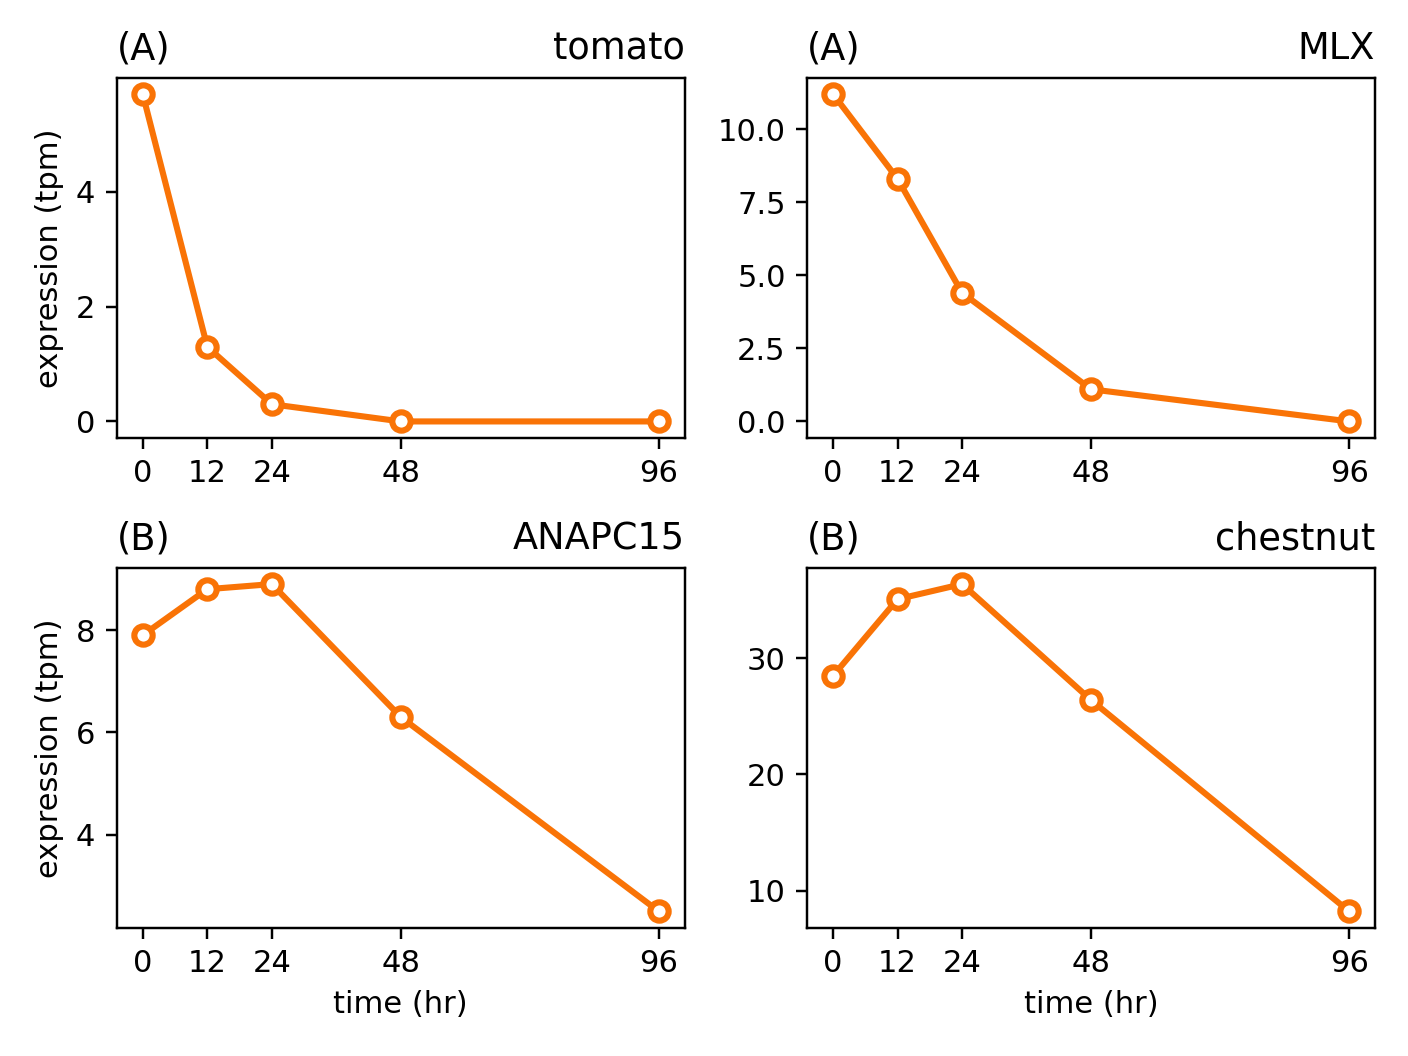

In [7]:
fig3, axes3 = plt.subplots(2,2)
genes  = ['tomato', 'MLX', 'ANAPC15', 'chestnut']
for k,g in enumerate(genes):
    i = k//2
    j = k%2
    axes3[i,j].plot(timepoints, tpmdata[g], 
             marker='o',
             markerfacecolor='w', 
             markeredgecolor=('xkcd:orange'),
             markeredgewidth=2,
             color=('xkcd:orange'), 
             linewidth=2)
    axes3[i,j].set_title('({})'.format('ABCD'[i]), loc='left')
    axes3[i,j].set_title('{}'.format(g), loc='right')
    axes3[i,j].set_xticks(timepoints)
    if i == 1: axes3[i,j].set_xlabel('time (hr)')
    if j == 0: axes3[i,j].set_ylabel('expression (tpm)')

plt.tight_layout()


# Saving figures

The script saves its single figure using, essentially:

``` 
outfile = 'figure1.png'
plt.savefile(outfile)
```

Here, within our notebook page, we have the three figures named separate things (`fig1`, `fig2`, and `fig3`), so instead of using `plt` we can just do:

In [8]:
fig3.savefig('myfigure.png')

Check, and you'll see that you have a new file `myfigure.png` in the directory.

One step on the journey to using Python, matplotlib, and Jupyter Notebook to produce figures for your next paper?